## ANALYSIS

In [52]:
%load_ext autoreload
%autoreload 2
from common import *

In [57]:
RESULT_JSON = "/Users/law/repos/viper/results/access_pattern/all_access_pattern.json"

In [66]:
import json

results_raw = json.loads(open(RESULT_JSON).read())
assert results_raw["context"]["library_build_type"] != "debug"

BENCHMARKS =  results_raw["benchmarks"]
# print(BENCHMARKS)

In [67]:
from collections import defaultdict
runs = defaultdict(list)

DIMM = 'dimm'
BLOCK = 'block'

for bm in BENCHMARKS:
    if DIMM in bm['name']:
        runs[DIMM].append(bm)
    elif BLOCK in bm['name']:
        runs[BLOCK].append(bm)
    else:
        raise RuntimeError(f"Unknown benchmark type {bm['name']}")

runs[DIMM].sort(key=lambda x: x['threads'])
runs[BLOCK].sort(key=lambda x: x['threads'])

pprint(runs)

defaultdict(<class 'list'>,
            {'block': [{'cpu_time': 79224800.54900001,
                        'items_per_second': 629441.4071147689,
                        'iterations': 1,
                        'name': 'ViperFixture<KeyType16,ValueType200>/insert_block_based/100000000/50000000/iterations:1/repeats:1/real_time/threads:1',
                        'real_time': 79435511.28800027,
                        'repetition_index': 0,
                        'repetitions': 1,
                        'run_name': 'ViperFixture<KeyType16,ValueType200>/insert_block_based/100000000/50000000/iterations:1/repeats:1/real_time/threads:1',
                        'run_type': 'iteration',
                        'threads': 1,
                        'time_unit': 'us'},
                       {'cpu_time': 39595738.195000015,
                        'items_per_second': 1259330.085145126,
                        'iterations': 2,
                        'name': 'ViperFixture<KeyType16,ValueType20

                      {'cpu_time': 9796884.02151613,
                       'items_per_second': 5089225.909653979,
                       'iterations': 31,
                       'name': 'ViperFixture<KeyType16,ValueType200>/insert_dimm_based/100000000/50000000/iterations:1/repeats:1/real_time/threads:31',
                       'real_time': 316925.01544103445,
                       'repetition_index': 0,
                       'repetitions': 1,
                       'run_name': 'ViperFixture<KeyType16,ValueType200>/insert_dimm_based/100000000/50000000/iterations:1/repeats:1/real_time/threads:31',
                       'run_type': 'iteration',
                       'threads': 31,
                       'time_unit': 'us'},
                      {'cpu_time': 10381374.646906253,
                       'items_per_second': 4801376.2076577665,
                       'iterations': 32,
                       'name': 'ViperFixture<KeyType16,ValueType200>/insert_dimm_based/100000000/50000000

## PLOTS

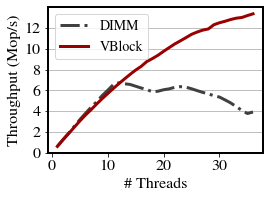

In [69]:
dimm_runs = [run['items_per_second'] / MILLION for run in runs[DIMM]]
block_runs = [run['items_per_second'] / MILLION for run in runs[BLOCK]]

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

#           red        blue       green      grey       purple
COLORS = ['#990000', '#000099', '#006600', '#404040', '#990099']

num_threads = list(range(1, 37, ))
ax.plot(num_threads, dimm_runs, label="DIMM", ls='-.', color=COLORS[3])
ax.plot(num_threads, block_runs, label="VBlock", ls='-', color=COLORS[0])
ax.set_yticks(range(1, 12))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_ylabel("Throughput (Mop/s)", fontsize=16)
ax.set_xlabel("# Threads", fontsize=16)
ax.legend(frameon=True)

ax.set_axisbelow(True)
ax.grid(axis='y', which='major')
fig.savefig('charts/access_pattern.pdf', bbox_inches='tight')
fig.savefig('charts/access_pattern.svg', bbox_inches='tight')